<a href="https://colab.research.google.com/github/ayush2281/Pytorch-for-ML-DL-/blob/main/%F0%9F%A4%A8_Chapter_2_%E2%80%93_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 02. Neural Netwrok of classifaction
classifiaction is the problem of predicting whether something is one thing or anotherthing, (there can be multiple things as the options).

Book: https://www.learnpytorch.io/02_pytorch_classification/


## 1. Make classification  data and get it ready

In [1]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles

X,Y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)


In [2]:
len(X), len(Y)

(1000, 1000)

In [3]:
print('first five samples of the X: ',X[:5])

first five samples of the X:  [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [4]:
print('first five samples of the Y: ',Y[:5])

first five samples of the Y:  [1 1 1 1 0]


In [5]:
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
# make dataframeof circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                       "X2": X[:, 1],
                       "label": Y})

circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


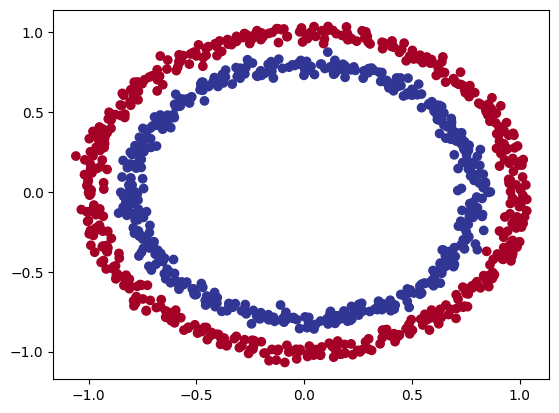

In [7]:
# Visualize, cisulaize , visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
           y=X[:,1],
           c=Y,
           cmap=plt.cm.RdYlBu)


* Note : the data we're working with is often refered to as a toy dataset, a dataset that is small enough to expermient but still sizeable enough to practice the fundamental..


 *Know More Visit :*  https://scikit-learn.org/1.5/datasets/toy_dataset.html

## 1.1checking input and output shapes

In [8]:
X.shape, Y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
# view the first example of feature  and labels
X_sample = X[0]
Y_sample = Y[0]
print(f"Sample input of X: {X_sample} and sample output of Y: {Y_sample}")
print(f"Shape of one sample: {X_sample.shape} and shape of Y[0]: {Y_sample.shape}")

Sample input of X: [0.75424625 0.23148074] and sample output of Y: 1
Shape of one sample: (2,) and shape of Y[0]: ()


In [11]:
# print the first  five rows and column
first_five = X[: 5] , Y[:5]
print(first_five)

(array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]]), array([1, 1, 1, 1, 0]))


## 1.2 Turn data into the tensors and create an train  test split

In [12]:
import torch
torch.__version__

'2.4.1+cu121'

In [13]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)


In [14]:
X[:5], Y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
X.dtype, Y.dtype

(torch.float32, torch.float32)

In [16]:
torch.manual_seed(42)

In [17]:
## Split data into training and test split
from  sklearn.model_selection import train_test_split

X_train, X_test, Y_train ,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(Y_train), len(Y_test)

(800, 200, 800, 200)

In [18]:
n_samples

1000

# let's build a model

let's build a model to classify our blue and red dots

To do , we want to:
1. steup device agnostic code sp ourt code will run on accelerator (CPU) there is one
2.Construct a model (by subclassing nn.module)
3. define a loss fucntion and Optimize
4. create a training and test loop

In [19]:
# import pytich and nn
import torch
from torch import nn

# Make device agnostic  code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [20]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's build our model

1. Subclass `nn.module` (almost all models in pytorch Subclass `nn.Module`)
2. create `nn.lunear() layer `that are capable of handeling the shapes of our data
3. defines a `forward()` method that defines the forward pass(or forward computation) of thr model
4. instatiate an instance of our model and send it to the target `device`

In [21]:
X_train.shape

torch.Size([800, 2])

In [22]:
## Contruct the model that sublasses nn.modules
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #2 Create 2 nn.linear layer capable of handeling the shapes of the shape our data
        self.layer_1 =nn.Linear(in_features=2 , out_features=5) #  takes in 2 feature and upscale to 5 feature
        self.layer_2 = nn.Linear(in_features=5, out_features=1) #  takes in 5 feature from  previous layer and output single feature(same shapes as y)
        self.two_linear_layers = nn.Sequential(
           nn.Linear(in_features=2, out_features=5),
           nn.Linear(in_features=5, out_features=1)
        )
    # 3. define a forward() method that outlines the forward pass
    def forward(self, x):
      # return self.layer_2(self.layer_1(x)) # x--> layer_1 --> layer_2 --> output

      return self.two_linear_layers(x)




   # 4 Instantiate an instance of ur model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

## Making neural network visual
*visit :* https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.22237&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

*for the making some visualization use this:* https://www.figma.com/board/Kjer5IWperNkJeEx9wLaFd/Welcome-to-FigJam?node-id=0-1&node-type=canvas&t=BMNtxkvIQ9mQj3xR-0

In [23]:
# Let's replicate the mdoel above using nn.squential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)


).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732]])),
             ('0.bias', tensor([-0.5424,  0.5802,  0.2037,  0.2929,  0.2236])),
             ('1.weight',
              tensor([[-0.0078,  0.3500, -0.3178,  0.0282, -0.3052]])),
             ('1.bias', tensor([0.1379]))])

In [25]:
# Make some prediction with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of prediction:", len(untrained_preds), "Shape", (untrained_preds.shape))
print(f"length of test samples:", len(X_test), "Shape :", (X_test.shape))
print(f"First 10 predictions: {torch.round(untrained_preds[:10])}")
print(f"First 10 label:", Y_test[:10])



Length of prediction: 200 Shape torch.Size([200, 1])
length of test samples: 200 Shape : torch.Size([200, 2])
First 10 predictions: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)
First 10 label: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [26]:
X_test[:10], Y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

##2.1 setup loss fucntion and optimizer
which loss fucntionn and optimizer should we use?

Again... this is problem specific.

for example for regression we might use MAE or MSE
for classification we might use binary cross entropy or categorical  cross entropy

AS a remainder , the loss fucntion measures how *wrong* your model prediction are.

And a optimizer two of most common and useful are SGD and Adam, however Pytorch how many built-in option.

* For the loss function we're going to use `tensor.nn.BECWithLogitsLoss()` for more on what binary cross entropy (BCE) is checkout, this article - https://towardsdatascience.com/

* For the definition on what a logit is in deep learning :https://en.wikipedia.org/wiki/Logit

* for different optimizers see `torchh.optim`

In [27]:
#Setup the loss function
# loss_fn = nn.BCE_loss()
loss_fn = nn.BCEWithLogitsLoss()

#Setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [28]:
# calculate the accuracy , - out of 100 examples , what percentage does our model get right?
def accuracy_fn(y_true, Y_pred):
  corrct = torch.eq(y_true, Y_pred).sum().item()
  acc = (correct/len(Y_pred))*100
  return acc

## 3. train Model
Too train our mdeol, we'ee going to need a build a training loop:

1. Forward pass
2. calculate the loss
3. optimizeer grad zero
4. Loss backward (backpropagtion)
5. optimizer step (Gradient descent)
  



## 3.1 Going from raw Logits --> prediction probabilities->  prediction label

our model outputs are going to raw **Logits**

We can convert these  Logits into ***predcition probabilities* by passing them to some kind of activation fucntion (eg. sigmoid func for binary classifiacation and softmax for multiclass classification).

then we can convert our model's prediction probabilties to prediction labels by either rouding them or taking argmax().

In [29]:
# View 1st five outputs of the forward pass on the test data
Y_logits = model_0(X_test.to(device))[:5]
Y_logits

tensor([[0.0763],
        [0.1453],
        [0.0813],
        [0.0742],
        [0.3760]], grad_fn=<SliceBackward0>)

In [30]:
Y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [31]:
# Use the sigmoid activation function on our model logits to turn them into prediction probablities..
Y_pred_probs = torch.sigmoid(Y_logits)
Y_pred_probs

tensor([[0.5191],
        [0.5363],
        [0.5203],
        [0.5185],
        [0.5929]], grad_fn=<SigmoidBackward0>)

For our prediction probabilities values, we need to perform a range-style rounding on them:

* `Y_preds_probs` >= 0.5, `Y=1` (class= 1)
* `Y_preds_probs` < 0.5, `Y=0` (class 0)



In [32]:
# find the predicted lables
Y_preds = torch.round(Y_pred_probs)

# In full (logits--> pred prob --> pred labels)
Y_preds_labels =torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(Y_preds.squeeze(), Y_test[:5].squeeze()))

# get rid of extra dimension
Y_preds.squeeze()


tensor([ True, False,  True, False,  True])


tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)

In [33]:
Y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [34]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

### 3.2 Building and training and testing loop
  

In [35]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), Y_train.to(device)
X_test, y_test = X_test.to(device), Y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=Y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=Y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70234, Accuracy: 57.38% | Test loss: 0.70194, Test acc: 57.00%
Epoch: 10 | Loss: 0.69697, Accuracy: 52.75% | Test loss: 0.69803, Test acc: 54.00%
Epoch: 20 | Loss: 0.69505, Accuracy: 51.62% | Test loss: 0.69667, Test acc: 51.00%
Epoch: 30 | Loss: 0.69427, Accuracy: 51.12% | Test loss: 0.69607, Test acc: 51.00%
Epoch: 40 | Loss: 0.69390, Accuracy: 50.38% | Test loss: 0.69573, Test acc: 49.50%
Epoch: 50 | Loss: 0.69367, Accuracy: 50.50% | Test loss: 0.69547, Test acc: 49.00%
Epoch: 60 | Loss: 0.69352, Accuracy: 50.38% | Test loss: 0.69526, Test acc: 49.00%
Epoch: 70 | Loss: 0.69341, Accuracy: 50.50% | Test loss: 0.69509, Test acc: 49.00%
Epoch: 80 | Loss: 0.69333, Accuracy: 50.38% | Test loss: 0.69495, Test acc: 49.00%
Epoch: 90 | Loss: 0.69326, Accuracy: 50.25% | Test loss: 0.69483, Test acc: 48.50%


Hmm, what do you notice about the performance of our model?

It looks like it went through the training and testing steps fine but the results don't seem to have moved too much.

The accuracy barely moves above 50% on each data split.

And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy).

##4. Make predictions and evaluate the model
From the metrics it looks like our model is random guessing.

How could we investigate this further?

I've got an idea.

The data explorer's motto!

"Visualize, visualize, visualize!"

Let's make a plot of our model's predictions, the data it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1.

To do so, we'll write some code to download and import the helper_functions.py script from the Learn PyTorch for Deep Learning repo.

It contains a helpful function called plot_decision_boundary() which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.

We'll also import `plot_predictions()` which we wrote in notebook 01 to use later.

In [36]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

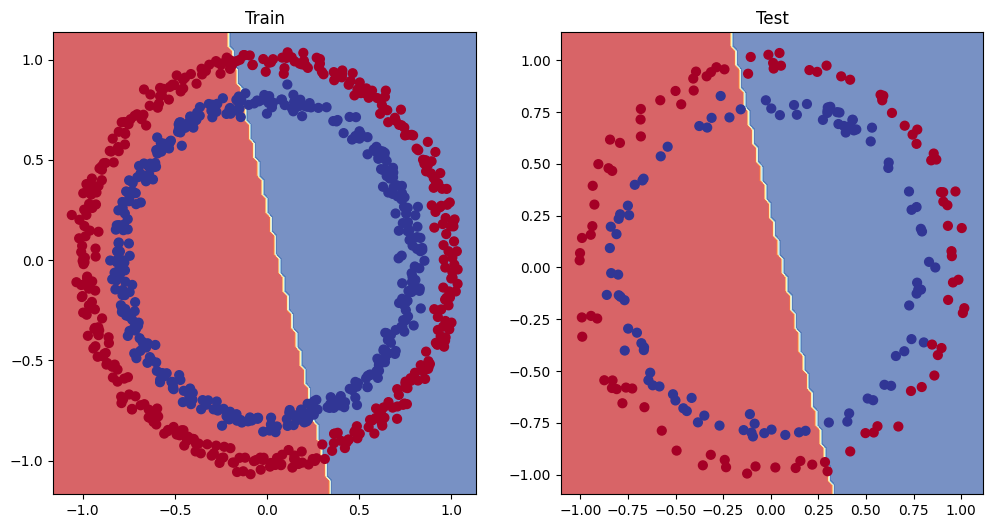

In [37]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


Oh wow, it seems like we've found the cause of model's performance issue.

It's currently trying to split the red and blue dots using a straight line...

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

In machine learning terms, our model is **underfitting**, meaning it's not learning predictive patterns from the data.

How could we improve this?

In [38]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2939,  0.6331],
                      [ 0.3755, -0.2920],
                      [ 0.4503,  0.1051],
                      [ 0.3622, -0.4324],
                      [-0.6655, -0.2908]])),
             ('0.bias', tensor([-0.5436,  0.5543,  0.2310,  0.2925,  0.2486])),
             ('1.weight',
              tensor([[ 0.0399,  0.2385, -0.3796, -0.0650, -0.2604]])),
             ('1.bias', tensor([0.0558]))])

## 5. Imporving the model (from a model perspective)

* Add more layers = give the model more chances to learn about the pattern in the data
* Add more hidden units - go from 5 hidden units
* fir for longer
* change the learning rate
* change the loss funtion

these options are all from a model a perspective beecause they deal directly with the model , rather than data.

And because thse options are all values(machine leearning engineer and data scincetist) can change, they are refer to **hyperparametr**

let's try and improve our model by adding more hidden layer

In [39]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)

    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operation leverages speed ups where behind the scenes

model_1 = CircleModelV1().to(device)
model_1




CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [40]:
# crate a loss function
loss_fn = nn.BCEWithLogitsLoss()

# create an ioptimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)



In [41]:
# write the training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), Y_train.to(device)
X_test, y_train


for epoch in range(epochs):
  ## Training
  model_1.train()
  #1. Forward
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=Y_train, y_pred=y_pred)

  # 3. zero grad
  optimizer.zero_grad()

  # 4. loss backward (backpropagation)
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  # testring
  model_1.eval()
  with torch.inference_mode():
    #1.  forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=Y_test, y_pred=test_pred)

    # print out what's happein
    if epoch % 10 == 0:
               print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 10 | Loss: 0.69369, Accuracy: 50.25% | Test loss: 0.69270, Test acc: 50.00%
Epoch: 20 | Loss: 0.69351, Accuracy: 50.12% | Test loss: 0.69283, Test acc: 49.50%
Epoch: 30 | Loss: 0.69339, Accuracy: 50.50% | Test loss: 0.69297, Test acc: 48.00%
Epoch: 40 | Loss: 0.69329, Accuracy: 50.38% | Test loss: 0.69310, Test acc: 49.00%
Epoch: 50 | Loss: 0.69322, Accuracy: 49.88% | Test loss: 0.69324, Test acc: 50.00%
Epoch: 60 | Loss: 0.69317, Accuracy: 49.38% | Test loss: 0.69336, Test acc: 51.50%
Epoch: 70 | Loss: 0.69312, Accuracy: 49.38% | Test loss: 0.69348, Test acc: 50.50%
Epoch: 80 | Loss: 0.69309, Accuracy: 50.12% | Test loss: 0.69359, Test acc: 50.00%
Epoch: 90 | Loss: 0.69307, Accuracy: 50.50% | Test loss: 0.69370, Test acc: 48.50%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 110 | Loss: 0.69303, Accuracy: 50.88% | Test loss: 0.69388, Test acc: 46.50%
Epo

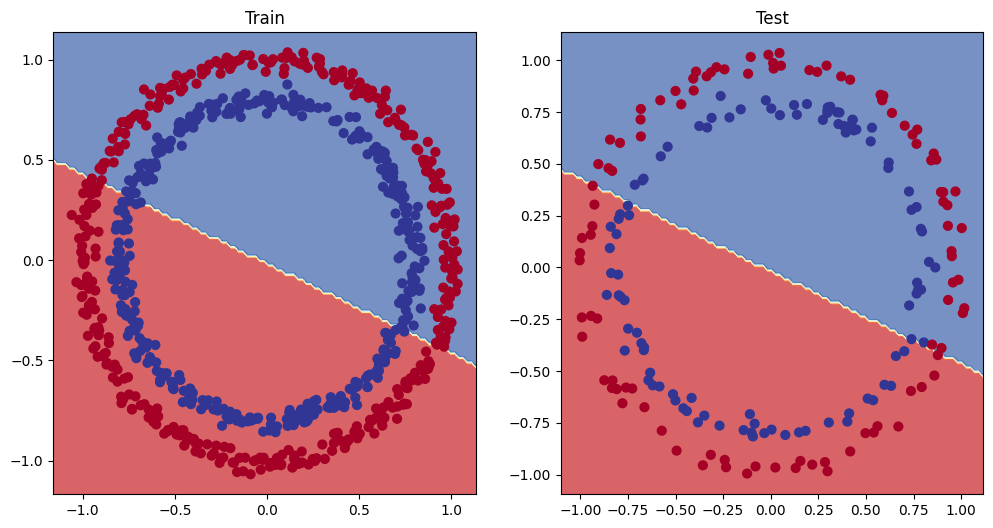

In [42]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

##5.1 Preparing data to see if our model can fit a straight line
Let's create some linear data to see if our model's able to model it and we're not just using a model that can't learn anything.

In [43]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [44]:
# create train and test split
train_split = int(0.8 * len(X_regression))
X_train_reg = X_regression[:train_split]
y_train_reg = y_regression[:train_split]
X_test_reg = X_regression[train_split:]
y_test_reg = y_regression[train_split:]

#ceck the length of each
len(X_train_reg),len(X_test_reg), len(y_train_reg),  len(y_test_reg)

(80, 20, 80, 20)

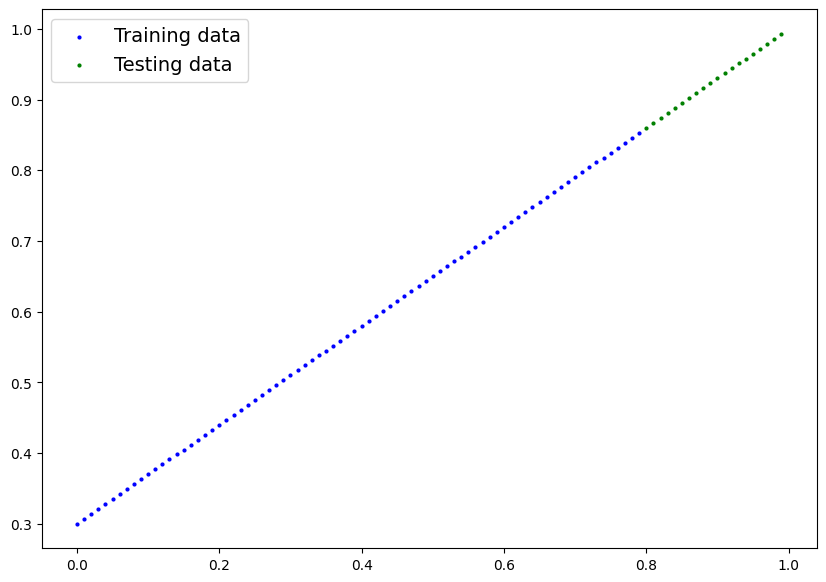

In [45]:
plot_predictions(train_data= X_train_reg,
                train_labels = y_train_reg,
                test_data = X_test_reg,
                test_labels = y_test_reg);

##5.2 Adjusting model_1 to fit a straight line
Now we've got some data, let's recreate model_1 but with a loss function suited to our regression data.

In [46]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [47]:
# loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [48]:

# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set gthe numnber of epochs
epochs =1000

# put the data on the target device

X_train_regression, Y_train_regression = X_train_reg.to(device), y_train_reg.to(device)
X_test_regression, Y_test_regression = X_test_reg.to(device), y_test_reg.to(device)


# training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, Y_train_regression)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, Y_test_regression)

  # print the whats happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")



Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 10 | Loss: 0.40240 | Test loss: 0.50474
Epoch: 20 | Loss: 0.06007 | Test loss: 0.10151
Epoch: 30 | Loss: 0.01559 | Test loss: 0.03231
Epoch: 40 | Loss: 0.03092 | Test loss: 0.00111
Epoch: 50 | Loss: 0.03196 | Test loss: 0.00108
Epoch: 60 | Loss: 0.03192 | Test loss: 0.00170
Epoch: 70 | Loss: 0.03081 | Test loss: 0.00097
Epoch: 80 | Loss: 0.03077 | Test loss: 0.00150
Epoch: 90 | Loss: 0.02967 | Test loss: 0.00092
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 110 | Loss: 0.02962 | Test loss: 0.00197
Epoch: 120 | Loss: 0.02748 | Test loss: 0.00091
Epoch: 130 | Loss: 0.02852 | Test loss: 0.00181
Epoch: 140 | Loss: 0.02850 | Test loss: 0.00246
Epoch: 150 | Loss: 0.02744 | Test loss: 0.00169
Epoch: 160 | Loss: 0.02638 | Test loss: 0.00123
Epoch: 170 | Loss: 0.02637 | Test loss: 0.00162
Epoch: 180 | Loss: 0.02532 | Test loss: 0.00125
Epoch: 190 | Loss: 0.02636 | Test loss: 0.00284
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epo

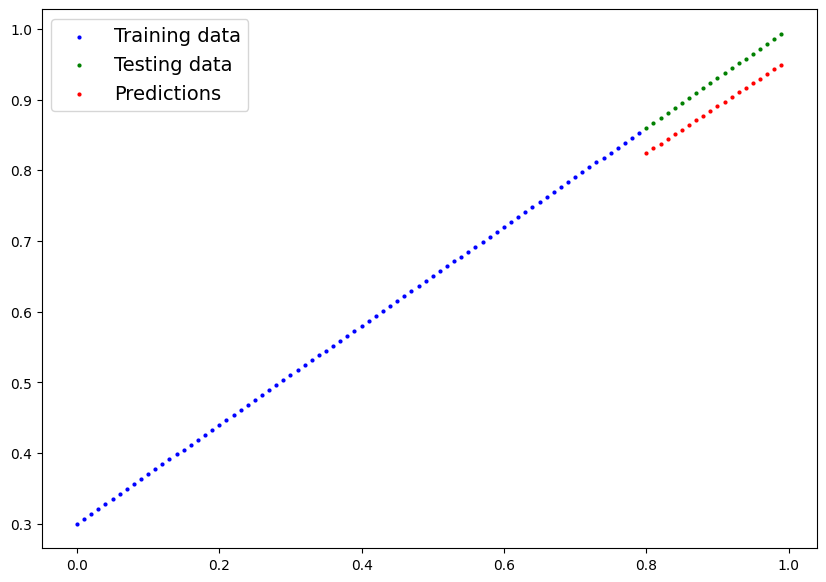

In [49]:
## Turn on evaluation mode
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)


# plot the data and predicions
plot_predictions(train_data= X_train_regression.cpu(),
                 train_labels = Y_train_regression.cpu(),
                 test_data = X_test_regression.cpu(),
                 test_labels = Y_test_regression.cpu(),
                 predictions = y_preds.cpu())

## 6 the missing : non-linearities
"What pattern could you drwa if you were given an infinite amount of a straight and non-staraight lines? "

or in machine learning terms, an inifinite (biut really it is finite) of linear and non-linear fucntion"

##6.1 Recreating non-linear data (red and blue circles)
First, let's recreate the data to start off fresh. We'll use the same setup as before.

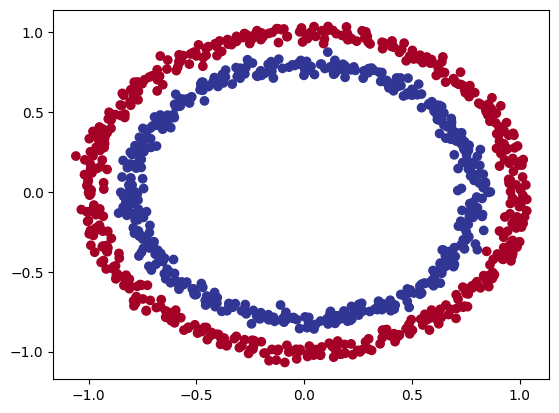

In [50]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise= 0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

Nice! Now let's split it into training and test sets using 80% of the data for training and 20% for testing.

In [51]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

##6.2 Building a model with non-linearity
* linear = straight linear
* Non-linear = non-straight

Artificial neural network are a large combination of linear (straight) and non-linear function which are potentially able to  find pattern in data..



In [54]:
# build a model with non linear actiovation fucntion
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)

    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation fucntion use for non-linearitries

  def forward(self,x):
    # where should we put non-linear activation fucntions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [55]:
# create a loss fucntion

loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

### 6.3 training our model with the non-linearities...

In [63]:
# write the training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


#looop through a data
epochs = 1000

for epoch in range(epochs):
  # Training
  model_3.train()
  # 1. Forward
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=Y_train, y_pred=y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  #  4. loss backward (backpropagation)
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  #Testing
  model_3.eval()
  with torch.inference_mode():
   # forward pass(
   test_logits = model_3(X_test).squeeze()
   test_pred = torch.round(torch.sigmoid(test_logits))

   # calculate the loss
   test_loss = loss_fn(test_logits, y_test)
   test_acc = accuracy_fn(y_true=Y_test, y_pred=test_pred)

   # print whats happenin'
   if epoch % 10 == 0:
               print(f"Epoch: {epoch} | Loss: {loss:.4f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")







Epoch: 0 | Loss: 0.6494, Accuracy: 66.62% | Test loss: 0.6592, Test acc: 60.00%
Epoch: 10 | Loss: 0.6475, Accuracy: 66.88% | Test loss: 0.6578, Test acc: 59.00%
Epoch: 20 | Loss: 0.6455, Accuracy: 66.88% | Test loss: 0.6562, Test acc: 59.00%
Epoch: 30 | Loss: 0.6434, Accuracy: 66.88% | Test loss: 0.6546, Test acc: 59.00%
Epoch: 40 | Loss: 0.6411, Accuracy: 67.25% | Test loss: 0.6529, Test acc: 59.00%
Epoch: 50 | Loss: 0.6387, Accuracy: 67.25% | Test loss: 0.6511, Test acc: 59.50%
Epoch: 60 | Loss: 0.6362, Accuracy: 67.12% | Test loss: 0.6491, Test acc: 60.50%
Epoch: 70 | Loss: 0.6336, Accuracy: 67.38% | Test loss: 0.6470, Test acc: 60.50%
Epoch: 80 | Loss: 0.6308, Accuracy: 68.00% | Test loss: 0.6447, Test acc: 60.50%
Epoch: 90 | Loss: 0.6278, Accuracy: 68.75% | Test loss: 0.6422, Test acc: 60.50%
Epoch: 100 | Loss: 0.6246, Accuracy: 68.88% | Test loss: 0.6395, Test acc: 62.00%
Epoch: 110 | Loss: 0.6212, Accuracy: 69.38% | Test loss: 0.6365, Test acc: 63.50%
Epoch: 120 | Loss: 0.6175, 

### 6.4 Evaluating a model trained with non-linear activation fucntions

In [73]:
# make a predicrtion
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test)))

y_preds[:10].squeeze(), y_test[:10] # squeeze because they dont have same dimensions


(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

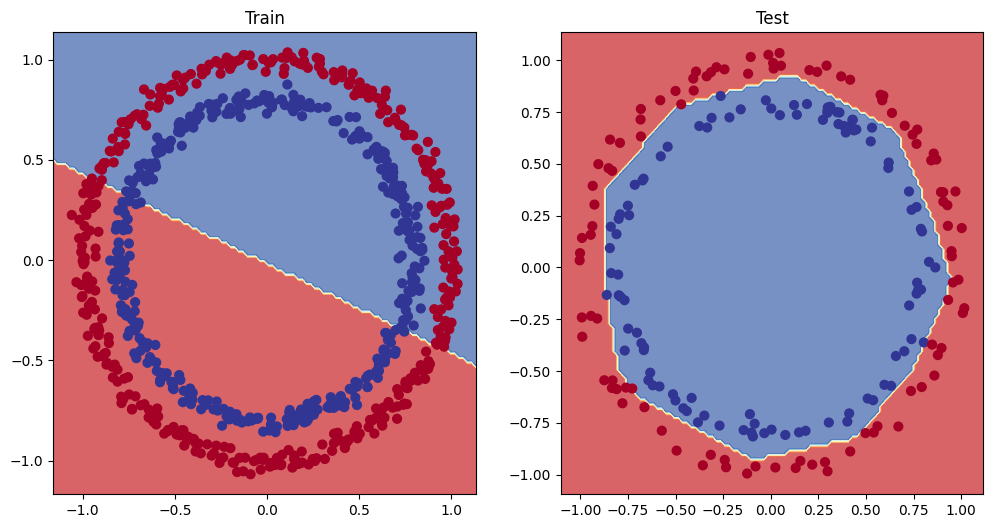

In [75]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # mdoel_1 is no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 is non linearities

wowwwww see we did, this is the power of non linearitries